In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/GitHub/FL-project

/content/drive/MyDrive/GitHub/FL-project


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git remote add origin https://github.com/Mattizza/FL-project

fatal: not a git repository (or any of the parent directories): .git


In [1]:

# Cloning only the branch of interest.

!git clone -b wandb-dev https://github.com/Mattizza/FL-project

Cloning into 'FL-project'...
remote: Enumerating objects: 1869, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 1869 (delta 75), reused 154 (delta 66), pack-reused 1688
Receiving objects: 100% (1869/1869), 591.85 MiB | 25.84 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Updating files: 100% (1723/1723), done.


In [1]:
%cd FL-project

/content/FL-project


In [ ]:
!pip install wandb

In [2]:
from main import *
import argparse
from centralized import Centralized
from client import *
from torch import optim, nn
from torch.optim import lr_scheduler
import numpy as np
import wandb

In [3]:

# Class used to simplify the assignment of the arguments.
class Args():
  
  def __init__(self, dataset, model, bs, hnm, num_epochs):
    '''
    Class used to pass the-high level parameters
      -) dataset   : the dataset we are considering;
      -) model     : the model we are using;
      -) bs        : the batch size;
      -) num_epochs: number of epochs for which we will train the model.
    '''
    self.dataset = dataset    
    self.model = model      
    self.bs = bs             
    self.hnm = hnm
    self.num_epochs = num_epochs

args = Args(dataset = 'iddaCB', model = 'deeplabv3_mobilenetv2', 
            bs = 16, hnm = False, num_epochs = 2)


In [4]:

# We get the dataset and we create an instance of the model.
trainAloneDataset, testAloneDatasets = get_datasets(args)

ds    = trainAloneDataset[0]
model = model_init(args)


In [5]:

# In order to simulate the behaviour of our model, we simulate a centralized
# environment.
centralized = Centralized(args,ds,model)
state_dict  = torch.load('modelliSalvati/checkpoint.pth')
model.classifier.load_state_dict(state_dict)

# wandb.login()


# # pprint.pprint(sweep_config)
# centralized.set_opt(opt_params)
# # Set how many steps we want to wait before plotting the loss.
# centralized.train(n_steps = 5)
# # Set how many steps we want to wait before plotting the vertical lines.
# centralized.print_learning(step = 10)


<All keys matched successfully>

In [7]:

# First we define our configuration
sweep_config = {
    
    'method': 'random',
    'metric': {
        'name': 'loss',
        'goal': 'minimize'
        },

    'parameters': {
        
        # \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
        # Hyperparameters that need additional hyperparameters, e.g. optimizer and scheduler.        
        'optimizer': {
            'parameters': {
                'name': {'values': ['Adam', 'SGD']},
                'settings': {'parameters': {
                    'lr'  : {'max': 0.1, 
                             'min': 0.01}
                             }
                             }
                    }
            },

        'scheduler': {
            'parameters':{
                'name'  : {'values': ['ConstantLR', 'ExponentialLR']},
                'settings': {'parameters':{      
                    'gamma': {'values': [0.1, 0.2, 0.3]},
                    'factor': {'values': [0.3, 0.5]}}}
                    }
                },

        # \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
        # Hyperparameters that are related to all the process, e.g. #layers or dropout.

        # 'lr': {
        #     'max': 0.10,
        #     'min': 0.01
        #     },
        # 'gamma': {
        #     'values' : [0.2, 0.3, 0.4]
        }
    }




# centralized.set_opt(opt_params)
# # Set how many steps we want to wait before plotting the loss.
# centralized.train(n_steps = 5)
# # Set how many steps we want to wait before plotting the vertical lines.
# centralized.print_learning(step = 10)


sweep_id = centralized.optimize(project = 'test-col', tags = 'improvements', notes = 'first try', 
                                n_steps = 5, config = sweep_config)
wandb.agent(sweep_id, centralized.train, count = 3)


Create sweep with ID: 4vwmts5a
Sweep URL: https://wandb.ai/mattizza/test-col/sweeps/4vwmts5a


wandb: Agent Starting Run: kzppjpqd with config:
wandb: 	optimizer: {'name': 'Adam', 'settings': {'lr': 0.07471387374960586}}
wandb: 	scheduler: {'name': 'ExponentialLR', 'settings': {'factor': 0.5, 'gamma': 0.3}}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Params freezed
epoch 1
epoch 1 / 2, step 5 / 37, loss = 2.377 ± 0.916
epoch 1 / 2, step 10 / 37, loss = 1.102 ± 0.506
epoch 1 / 2, step 15 / 37, loss = 0.809 ± 0.282
epoch 1 / 2, step 20 / 37, loss = 0.680 ± 0.279
epoch 1 / 2, step 25 / 37, loss = 0.625 ± 0.314
epoch 1 / 2, step 30 / 37, loss = 0.639 ± 0.322
epoch 1 / 2, step 35 / 37, loss = 0.468 ± 0.247
epoch 1 / 2, step 37 / 37, loss = 0.475 ± 0.266
epoch 2
epoch 2 / 2, step 5 / 37, loss = 0.524 ± 0.263
epoch 2 / 2, step 10 / 37, loss = 0.475 ± 0.260
epoch 2 / 2, step 15 / 37, loss = 0.461 ± 0.258
epoch 2 / 2, step 20 / 37, loss = 0.505 ± 0.281
epoch 2 / 2, step 25 / 37, loss = 0.530 ± 0.266
epoch 2 / 2, step 30 / 37, loss = 0.477 ± 0.236
epoch 2 / 2, step 35 / 37, loss = 0.476 ± 0.232
epoch 2 / 2, step 37 / 37, loss = 0.440 ± 0.225
Training finished!
Model saved!


loss,▁█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.44022


wandb: Agent Starting Run: 5a3g5kf1 with config:
wandb: 	optimizer: {'name': 'Adam', 'settings': {'lr': 0.028281287569530876}}
wandb: 	scheduler: {'name': 'ConstantLR', 'settings': {'factor': 0.5, 'gamma': 0.2}}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Params freezed
epoch 1
epoch 1 / 2, step 5 / 37, loss = 0.468 ± 0.251
epoch 1 / 2, step 10 / 37, loss = 0.444 ± 0.232
epoch 1 / 2, step 15 / 37, loss = 0.562 ± 0.278
epoch 1 / 2, step 20 / 37, loss = 0.423 ± 0.210
epoch 1 / 2, step 25 / 37, loss = 0.456 ± 0.238
epoch 1 / 2, step 30 / 37, loss = 0.403 ± 0.215
epoch 1 / 2, step 35 / 37, loss = 0.394 ± 0.223
epoch 1 / 2, step 37 / 37, loss = 0.373 ± 0.210
epoch 2
epoch 2 / 2, step 5 / 37, loss = 0.406 ± 0.216
epoch 2 / 2, step 10 / 37, loss = 0.355 ± 0.207
epoch 2 / 2, step 15 / 37, loss = 0.340 ± 0.210
epoch 2 / 2, step 20 / 37, loss = 0.313 ± 0.185
epoch 2 / 2, step 25 / 37, loss = 0.409 ± 0.221
epoch 2 / 2, step 30 / 37, loss = 0.332 ± 0.190
epoch 2 / 2, step 35 / 37, loss = 0.326 ± 0.202
epoch 2 / 2, step 37 / 37, loss = 0.370 ± 0.205
Training finished!
Model saved!


loss,▆▆▆▄▅▅▅▄█▅▃▂▄▅▄▅▄▄▂▁▂▂▄▃▂▂▃▁▃▃▁▁▂▄▂▂▂▂▁▃
loss,0.36965


wandb: Agent Starting Run: 0vvqouln with config:
wandb: 	optimizer: {'name': 'Adam', 'settings': {'lr': 0.0842341636472911}}
wandb: 	scheduler: {'name': 'ConstantLR', 'settings': {'factor': 0.5, 'gamma': 0.2}}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Params freezed
epoch 1
epoch 1 / 2, step 5 / 37, loss = 0.442 ± 0.239
epoch 1 / 2, step 10 / 37, loss = 0.396 ± 0.215
epoch 1 / 2, step 15 / 37, loss = 0.392 ± 0.206
epoch 1 / 2, step 20 / 37, loss = 0.381 ± 0.212
epoch 1 / 2, step 25 / 37, loss = 0.382 ± 0.208
epoch 1 / 2, step 30 / 37, loss = 0.338 ± 0.193
epoch 1 / 2, step 35 / 37, loss = 0.313 ± 0.193
epoch 1 / 2, step 37 / 37, loss = 0.328 ± 0.201
epoch 2
epoch 2 / 2, step 5 / 37, loss = 0.313 ± 0.182
epoch 2 / 2, step 10 / 37, loss = 0.295 ± 0.176
epoch 2 / 2, step 15 / 37, loss = 0.355 ± 0.211
epoch 2 / 2, step 20 / 37, loss = 0.313 ± 0.186
epoch 2 / 2, step 25 / 37, loss = 0.288 ± 0.187
epoch 2 / 2, step 30 / 37, loss = 0.325 ± 0.203
epoch 2 / 2, step 35 / 37, loss = 0.304 ± 0.187
epoch 2 / 2, step 37 / 37, loss = 0.332 ± 0.195
Training finished!
Model saved!


loss,▂█▄▃▅▃▃▄▃▃▃▂▂▃▃▃▂▃▂▄▃▂▂▃▂▂▂▂▂▂▂▂▃▁▁▂▂▂▂▂
loss,0.33174


In [7]:

# We import the metrics used to compute the goodness of our model and we test
# on our data.
from utils.stream_metrics import StreamSegMetrics
metric = StreamSegMetrics(16, 'centralizzato')
centralized.test(metric)


In [ ]:

# Here we can choose what kind of metric to show. Possible choices are:
#   -) Total samples    -) Mean IoU
#   -) Overall Acc      -) Class IoU
#   -) Mean Acc         -) Class Acc
#   -) Mean Precision   -) Class Prec
#   -) FreqW Acc 

metric.get_results()['Mean IoU']


0.5471762280683421

In [ ]:

from torch.utils.data import DataLoader
train_loader = DataLoader(ds, batch_size = 2, shuffle = False, drop_last = True)


In [ ]:

centralized.model.eval()
with torch.no_grad():
  for i, (images, labels) in enumerate(train_loader):
    images = images.cuda() 
    labels = labels.cuda()
    outputs = centralized.model(images)['out']
    break


In [ ]:
outputs = centralized.model(images[0].view(1, 3, 512, 928))['out']

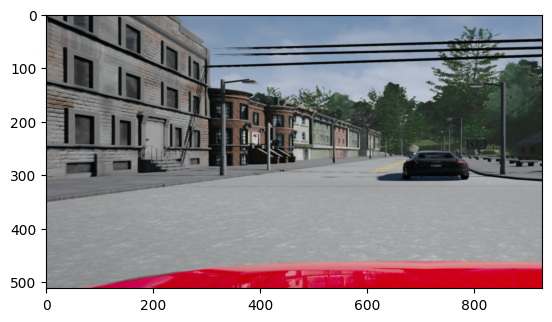

In [ ]:

import matplotlib.pyplot as plt
def unNormalize(tensorImage, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
        for t, m, s in zip(tensorImage, mean, std):
            t.mul_(s).add_(m)
        return tensorImage
plt.imshow(unNormalize(images[0].cpu()).permute(1,2,0))


In [ ]:

singoloOutputLogits = outputs[0]
prediction = singoloOutputLogits.argmax(0)


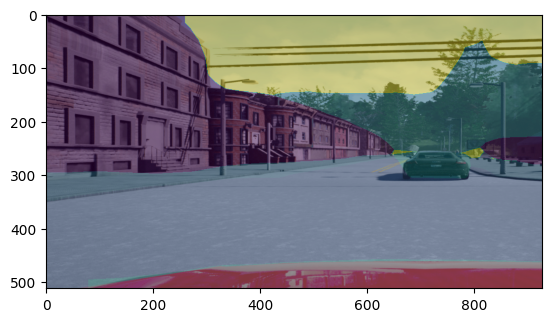

In [ ]:

import matplotlib.pyplot as plt
plt.imshow(unNormalize(images[0].cpu()).permute(1,2,0))
plt.imshow(prediction.cpu().numpy(), alpha = 0.4)


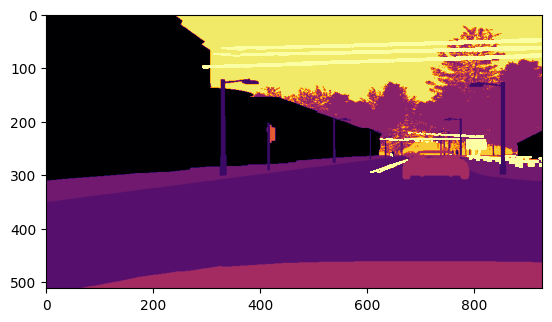

In [ ]:

import matplotlib as mpl

plt.imshow(labels[0].cpu().numpy(), cmap = mpl.colormaps['inferno'], vmin = 0, vmax = 16)
